In [26]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances

import numpy as np
import pandas as pd

In [27]:
# Labels must be in numeric format
# Create a dataset 
labels = [0,0,0,1,1,1,2,2,2]
data = [[1,10],[1,20],[1,30],[1,100],[1,110],[1,120],[1,50],[1,51],[1,52]]

# DATAFRAME
dats = pd.DataFrame(data=data,dtype=float)
dats['labels'] = labels
dats

,0,1,labels
0,1.0,10.0,0
1,1.0,20.0,0
2,1.0,30.0,0
3,1.0,100.0,1
4,1.0,110.0,1
5,1.0,120.0,1
6,1.0,50.0,2
7,1.0,51.0,2
8,1.0,52.0,2


In [28]:
# First sort data by label column
dats = dats.sort_values(by=['labels'])

# Then group dataset with Label column - to find number of clusters
gp = dats.groupby('labels')
cluster_index = gp.groups # THis will give the cluster name and indices of dataframe that belong to that cluster

## FORMULA

### Intra cluster

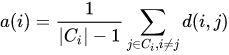

### Inter CLuster

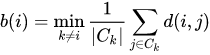

### Coefficient

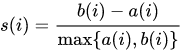

In [36]:
# Create columns to store

## Intra cluster distance
dats['a'] = ''

## distnace of a point to other clusters
name = [] 
for i in range(1,len(cluster_index)):
  dats['cluster'+str(i)] = ''
  name.append('cluster'+str(i)) 

In [37]:
# Distance matrix- Euclidian distance
dist = pdist(data,metric = 'euclidean')

# Symmetric distance matrix
dist_matrix = pd.DataFrame(squareform(dist))
dist_matrix

,0,1,2,3,4,5,6,7,8
0,0.0,10.0,20.0,90.0,100.0,110.0,40.0,41.0,42.0
1,10.0,0.0,10.0,80.0,90.0,100.0,30.0,31.0,32.0
2,20.0,10.0,0.0,70.0,80.0,90.0,20.0,21.0,22.0
3,90.0,80.0,70.0,0.0,10.0,20.0,50.0,49.0,48.0
4,100.0,90.0,80.0,10.0,0.0,10.0,60.0,59.0,58.0
5,110.0,100.0,90.0,20.0,10.0,0.0,70.0,69.0,68.0
6,40.0,30.0,20.0,50.0,60.0,70.0,0.0,1.0,2.0
7,41.0,31.0,21.0,49.0,59.0,69.0,1.0,0.0,1.0
8,42.0,32.0,22.0,48.0,58.0,68.0,2.0,1.0,0.0


In [38]:
# Find 'a' and store it
c=0 # Counter to store data in dataframe directly
for i in cluster_index.keys():
  z = cluster_index[i] 
  for j in z:
    s = 0
    for k in z:
      if j!=k:
        s += dist_matrix[j][k]
    dats.loc[c,'a'] = s/(len(z)-1)
    c = c+1

In [39]:
dats

,0,1,labels,a,cluster1,cluster2
0,1.0,10.0,0,15,,
1,1.0,20.0,0,10,,
2,1.0,30.0,0,15,,
3,1.0,100.0,1,15,,
4,1.0,110.0,1,10,,
5,1.0,120.0,1,15,,
6,1.0,50.0,2,1.5,,
7,1.0,51.0,2,1,,
8,1.0,52.0,2,1.5,,


In [40]:
dats

,0,1,labels,a,cluster1,cluster2
0,1.0,10.0,0,15,,
1,1.0,20.0,0,10,,
2,1.0,30.0,0,15,,
3,1.0,100.0,1,15,,
4,1.0,110.0,1,10,,
5,1.0,120.0,1,15,,
6,1.0,50.0,2,1.5,,
7,1.0,51.0,2,1,,
8,1.0,52.0,2,1.5,,


In [42]:
# Distance of point with other clusters
cluster_index
#name = ['cluster1','cluster2']

for i in cluster_index.keys():
  a = cluster_index.copy()
  a.pop(i)
  d = 0
  for j in a.keys():
    for k in cluster_index[i]:
      s = 0
      for l in cluster_index[j]:
          s =s + dist_matrix[k][l]     
      dats.loc[k,name[d]] = s/3
    d=d+1

In [43]:
dats

,0,1,labels,a,cluster1,cluster2
0,1.0,10.0,0,15,100,41
1,1.0,20.0,0,10,90,31
2,1.0,30.0,0,15,80,21
3,1.0,100.0,1,15,80,49
4,1.0,110.0,1,10,90,59
5,1.0,120.0,1,15,100,69
6,1.0,50.0,2,1.5,30,60
7,1.0,51.0,2,1,31,59
8,1.0,52.0,2,1.5,32,58


In [44]:
# 'b'
## Find the nearest cluster (minimum distance from the point)
dats['b'] = dats[['cluster1','cluster2']].min(axis=1)

# Denominator
## Find max of 'a' and 'b'
dats['denom'] = dats[['a','b']].max(axis=1)

# Numerator
## 'b'-aa'
dats['num'] = dats['b'] - dats['a']

# Create the fraction
dats['sil'] = dats['num']/dats['denom']

In [45]:
dats

,0,1,labels,a,cluster1,cluster2,b,denom,num,sil
0,1.0,10.0,0,15,100,41,41.0,41.0,26,0.634146
1,1.0,20.0,0,10,90,31,31.0,31.0,21,0.677419
2,1.0,30.0,0,15,80,21,21.0,21.0,6,0.285714
3,1.0,100.0,1,15,80,49,49.0,49.0,34,0.693878
4,1.0,110.0,1,10,90,59,59.0,59.0,49,0.830508
5,1.0,120.0,1,15,100,69,69.0,69.0,54,0.782609
6,1.0,50.0,2,1.5,30,60,30.0,30.0,28.5,0.95
7,1.0,51.0,2,1,31,59,31.0,31.0,30,0.967742
8,1.0,52.0,2,1.5,32,58,32.0,32.0,30.5,0.953125


In [15]:
# Group by labels(Cluster names) and aggreagte silhoutte coefficient of each cluster
dats.sil = dats.sil.astype(float)
sillh = dats.groupby('labels').sil.agg('mean')

In [16]:
# FInd Silhoutte score
sillh.sum()/3

0.7527935154165705